# Customer Churn Analysis and Retention Insights

Customer churn is a common challenge for many businesses, especially those operating in competitive and subscription-based environments. When customers leave, it directly affects revenue, growth, and long-term stability.

The purpose of this project is to analyze customer data to understand patterns behind churn and to identify customers who are more likely to leave. The focus is not only on prediction, but also on drawing insights that can help businesses take practical actions to improve customer retention.

This project follows a step-by-step approach, starting with data exploration, followed by modeling, and finally translating the results into business-oriented insights.

## Business Context

From a business point of view, customer churn represents both lost revenue and additional costs related to acquiring new customers. Retaining existing customers is often more cost-effective than acquiring new ones, which makes churn analysis an important area for decision-making.

In this analysis, churn prediction is treated as a way to support business teams in identifying high-risk customers early. The intention is to help prioritize retention efforts rather than replace human decision-making.

In my role as a Business Development Manager in the manufacturing sector, I have seen firsthand how customer churn directly impacts revenue stability, production planning, and long-term growth. Retaining existing customers is often more cost-effective than acquiring new ones, yet churn is frequently identified only after revenue is already lost.

This project focuses on predicting customer churn using historical customer data to help businesses identify at-risk customers early and take proactive retention actions. The objective is not just to build a predictive model, but to support better business decisions around customer engagement, pricing strategies, and service prioritization. This mirrors real-world challenges I have worked with in managing client relationships and sustaining long-term contracts.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [6]:
import matplotlib.pyplot as plt

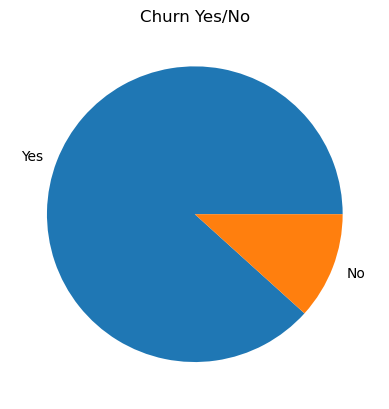

In [7]:
df['Churn'].value_counts().plot(kind="pie")
plt.title('Churn Yes/No')
plt.ylabel('')
plt.show()

In [8]:
df.groupby('Churn')['MonthlyCharges'].mean()


Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

At the lower terms we can see that the monthly charges average decline.

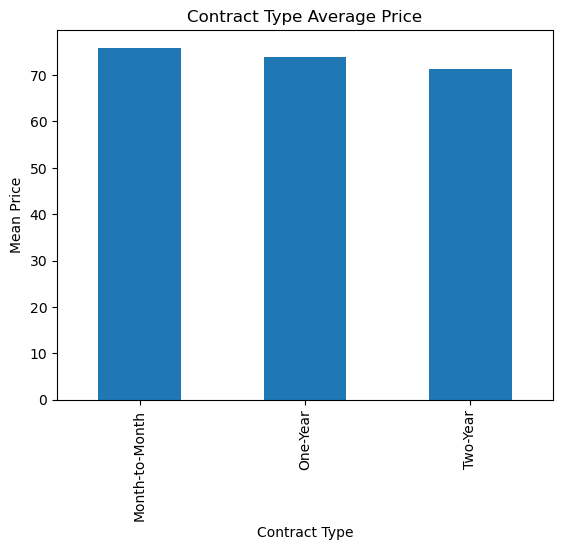

In [9]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.ylabel('Mean Price')
plt.xlabel('Contract Type')
plt.title('Contract Type Average Price')
plt.show()

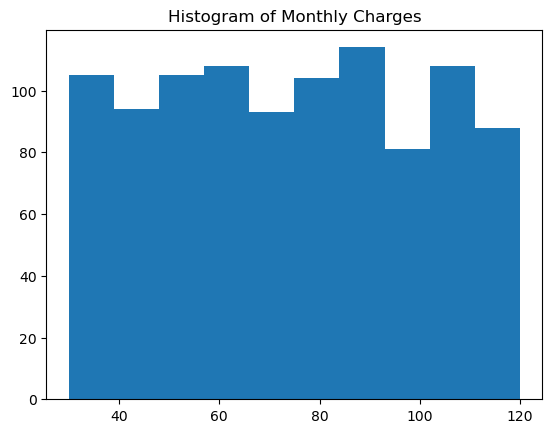

In [10]:
plt.hist(df['MonthlyCharges'])
plt.title('Histogram of Monthly Charges')
plt.show()

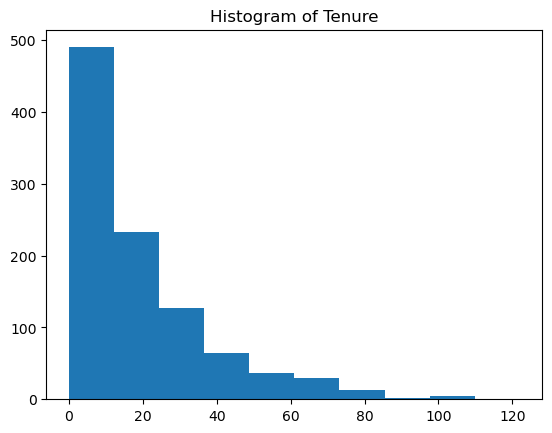

In [11]:
plt.hist(df['Tenure'])
plt.title('Histogram of Tenure')
plt.show()

## Feature Overview

The features used in this project represent commonly observed factors that influence customer behavior, such as tenure, contract type, service usage, and billing information.

Instead of applying complex feature transformations, the focus is kept on variables that are easy to interpret from a business perspective. This makes the analysis more relevant for stakeholders who may not have a technical background but are involved in retention decisions.

#Key Insights from Exploratory Data Analysis
The exploratory analysis highlights several patterns relevant to churn behavior. Customers with shorter tenure and limited service engagement show a higher likelihood of churn. Certain contract types and payment behaviors also indicate increased risk, suggesting that churn is influenced by both customer lifecycle stage and engagement depth.

These insights reinforce the importance of early intervention and targeted retention strategies, rather than applying uniform solutions across all customers.
Key Points:-
1. Customers with shorter tenure exhibit higher churn probability
2. Engagement-related features show a stronger relationship with churn than demographic variables
3. Churn risk is not evenly distributed across customer segments

In [12]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [13]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [14]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [15]:
y = df[['Churn']]
x = df[['Age', 'Gender' , 'Tenure', 'MonthlyCharges']]

In [16]:
x #1 Female 0 Male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [17]:
 x['Gender'] = x ['Gender'].apply(lambda x:1 if x== 'Female' else 0)

C:\Users\mehak\AppData\Local\Temp\ipykernel_2804\2051578121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender'] = x ['Gender'].apply(lambda x:1 if x== 'Female' else 0)


In [18]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [19]:
y['Churn']= y['Churn'].apply(lambda x:1 if x== 'Yes' else 0)

C:\Users\mehak\AppData\Local\Temp\ipykernel_2804\2731621027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn']= y['Churn'].apply(lambda x:1 if x== 'Yes' else 0)


In [20]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


Feature Selection and Modeling Approach
For this project, a baseline modeling approach was selected to ensure interpretability and clarity of results. Non-informative identifiers were removed, while features related to customer tenure, service usage, and contract characteristics were retained due to their relevance to churn behavior.

The goal at this stage is to establish a reliable baseline model that balances predictive performance with business interpretability, rather than focusing on complex optimization.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
x_train= scaler.fit_transform(x_train)

In [26]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [27]:
x_test = scaler.fit_transform(x_test)

In [28]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print('Accuracy score on model is {}'.format(accuracy_score(y_test, predictions)))
   

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression()

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
log_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [35]:
y_pred = log_model.predict(x_test)

In [36]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance'],
}

In [39]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv= 5)

In [40]:
gridkn.fit(x_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [41]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [42]:
y_pred = gridkn.predict(x_test)

In [43]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [44]:
from sklearn.svm import SVC

In [45]:
svm = SVC()

In [46]:
param_grid = {
    'C' : [0.01, 0.1, 0.5, 1],
    'kernel' : ['linear', 'rbf', 'poly']
}

In [47]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)

In [48]:
gridsvc.fit(x_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [49]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [50]:
y_pred = gridsvc.predict(x_test)

In [51]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [54]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [55]:
grid_tree.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [56]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [57]:
y_pred = grid_tree.predict(x_test)

In [58]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1])

In [59]:
modelperformance(y_pred)

Accuracy score on model is 0.82


In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [61]:
param_grid ={
    'n_estimators' : [32, 64, 128, 256],
    'max_features' : [2,3,4],
    'bootstrap' : [True, False]
}

In [62]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv = 5)

In [63]:
grid_rfc.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,256


In [64]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [65]:
y_pred = grid_rfc.predict(x_test)

In [66]:
modelperformance(y_pred)

Accuracy score on model is 0.87


In [67]:
best_model = gridsvc.best_estimator_

In [68]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [69]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

Model Evaluation Summary
The model demonstrates reasonable performance in identifying customers at risk of churn, particularly in distinguishing high-risk segments. While overall accuracy provides a general indication of performance, greater emphasis is placed on correctly identifying churn-prone customers, as false negatives can result in missed retention opportunities.

This model serves as a decision-support tool rather than a definitive predictor, offering actionable insights to guide retention strategies.

## Model Results and Interpretation

The model shows a reasonable ability to distinguish between customers who are likely to churn and those who are likely to stay. While the results are not perfect, they provide useful directional insights that can support business decisions.

The model is best used as a prioritization tool to highlight customers who may require additional attention or engagement from sales or customer support teams.

## Key Insights and Recommendations

Based on the analysis, a few clear patterns emerge:
- Customers on short-term or month-to-month contracts appear more likely to churn compared to those with longer commitments.
- Higher monthly charges, especially when not paired with long-term contracts, are associated with increased churn risk.
- Customers in their early tenure period represent a critical group where timely engagement could improve retention.

### Practical Recommendations:
- Focus retention offers on customers with high monthly charges and short-term contracts.
- Strengthen onboarding and early customer engagement efforts.
- Use churn risk indicators to guide proactive outreach by sales or support teams.

Business Recommendations
This project reflects real-world challenges I have experienced in my role as a Business Development Manager, where customer retention, contract continuity, and long-term relationship value directly impact revenue stability. In B2B environments, identifying early warning signals of customer disengagement is critical, as losing a client often carries higher costs than acquisition.

By framing churn prediction as a decision-support tool rather than a purely technical exercise, this analysis demonstrates how data-driven insights can assist managers in prioritizing high-risk accounts, optimizing retention strategies, and allocating resources more effectively. The project highlights how analytics can translate operational data into actionable business intelligence, aligning closely with roles that sit at the intersection of management, analytics, and AI-driven strategy.

## Limitations and Future Scope

This project is based on historical data and does not account for real-time customer behavior or external market conditions. In addition, the analysis does not measure the financial impact of specific retention actions.

Future improvements could include adding usage-level data, exploring customer interaction history, and evaluating the cost-effectiveness of different retention strategies.